<h1><center>Modelagem de ativos Magazine Luiza</h1></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Funçōes</h3>

In [2]:
class modelagem(object):
    def volatilidade(output):
        stock_return = output.pct_change()
        vol=100*stock_return.rolling(12).std() * np.sqrt(12)
        return vol
        pass
    def retorno(output):
        r1=np.log(output)- np.log(output.shift(1))
        r1 = r1*100
        return r1
        pass
    def risco(output):
        risco = output.std()
        return risco
        pass
    def index_shape(retorno,risco,risco_ref):
        sharpe = (retorno.mean()-risco_ref)/risco
        return sharpe
        pass
        

In [3]:
dados = pd.read_csv('../dados/MGLU3_D1.csv')
dados.head()

,Data,Horario,Open,High,Low,Close,Tick_Vol
0,2020.01.02,00:00,48.25,49.28,47.66,49.28,24821
1,2020.01.03,00:00,48.45,49.28,48.25,48.84,17631
2,2020.01.06,00:00,48.35,49.26,47.75,48.88,21936
3,2020.01.07,00:00,48.89,49.15,48.45,48.74,19403
4,2020.01.08,00:00,48.57,50.29,48.45,50.23,27242


In [4]:
close = dados.Close

In [5]:
lista = []
for index in range (len(dados)):
    lista.append(dados.Data[index][5:])
dados.Data = lista
dados.head()

,Data,Horario,Open,High,Low,Close,Tick_Vol
0,01.02,00:00,48.25,49.28,47.66,49.28,24821
1,01.03,00:00,48.45,49.28,48.25,48.84,17631
2,01.06,00:00,48.35,49.26,47.75,48.88,21936
3,01.07,00:00,48.89,49.15,48.45,48.74,19403
4,01.08,00:00,48.57,50.29,48.45,50.23,27242


In [7]:
vol = modelagem.volatilidade(close)
retorno = modelagem.retorno(close)
risco = modelagem.risco(close)

In [64]:
dic = {'Data':dados.Data,'Preco':close,'Volatilidade':vol,'Retorno':retorno,'Risco':risco}
dados_analisados = pd.DataFrame(data=dic)
dados_analisados.dropna(inplace=True)
dados_analisados.head()

,Data,Preco,Volatilidade,Retorno,Risco
12,01.20,55.94,6.929312,2.993964,16.279312
13,01.21,55.85,6.737991,-0.161016,16.279312
14,01.22,55.63,6.835668,-0.394690,16.279312
15,01.23,56.52,6.676319,1.587193,16.279312
16,01.24,56.09,6.645862,-0.763701,16.279312


In [65]:
dados_analisados.describe().round(4)

,Preco,Volatilidade,Retorno,Risco
count,158.0000,158.0000,158.0000,158.0000
mean,61.8665,14.3753,0.3093,16.2793
std,16.6557,11.2979,5.2493,0.0000
min,28.7800,5.1079,-23.6714,16.2793
25%,50.5075,8.5308,-1.4481,16.2793
50%,57.5950,10.6639,0.1116,16.2793
75%,79.2975,13.1113,2.7243,16.2793
max,95.3300,54.1286,21.1295,16.2793


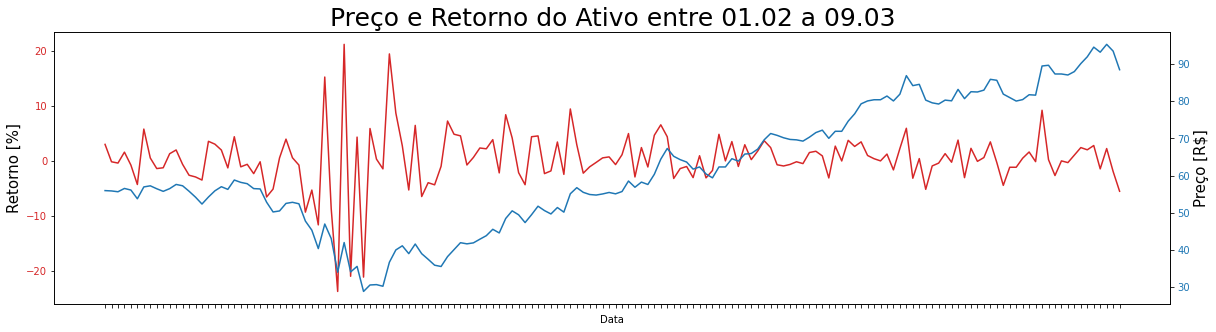

In [66]:
ax, fig = plt.subplots(figsize=(20, 5))
color = 'tab:red'
ax = sns.lineplot(x="Data", 
                  y="Retorno", 
                  data = dados_analisados,
                  color = color)
ax.set_ylabel('Retorno [%]', fontsize = 15)
ax.tick_params(axis='y', labelcolor=color)
ax.set_title ('Preço e Retorno do Ativo entre'+ ' '+ str(dados.Data[0]) + ' '+'a'+ ' '+ str(dados.Data[len(dados.Data)-1]), fontsize = 25)


ax2 = ax.twinx()
color = 'tab:blue'
ax2 = sns.lineplot(x="Data", 
                  y="Preco", 
                  data = dados_analisados,
                  color = color)
ax2.set_ylabel('Preço [R$]', fontsize = 15)
ax2.tick_params(axis='y', labelcolor=color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [10]:
menor_zero = dados_analisados.Retorno <= 0
maior_zero = dados_analisados.Retorno > 0
menor_zero = dados_analisados[menor_zero]
maior_zero = dados_analisados[maior_zero]

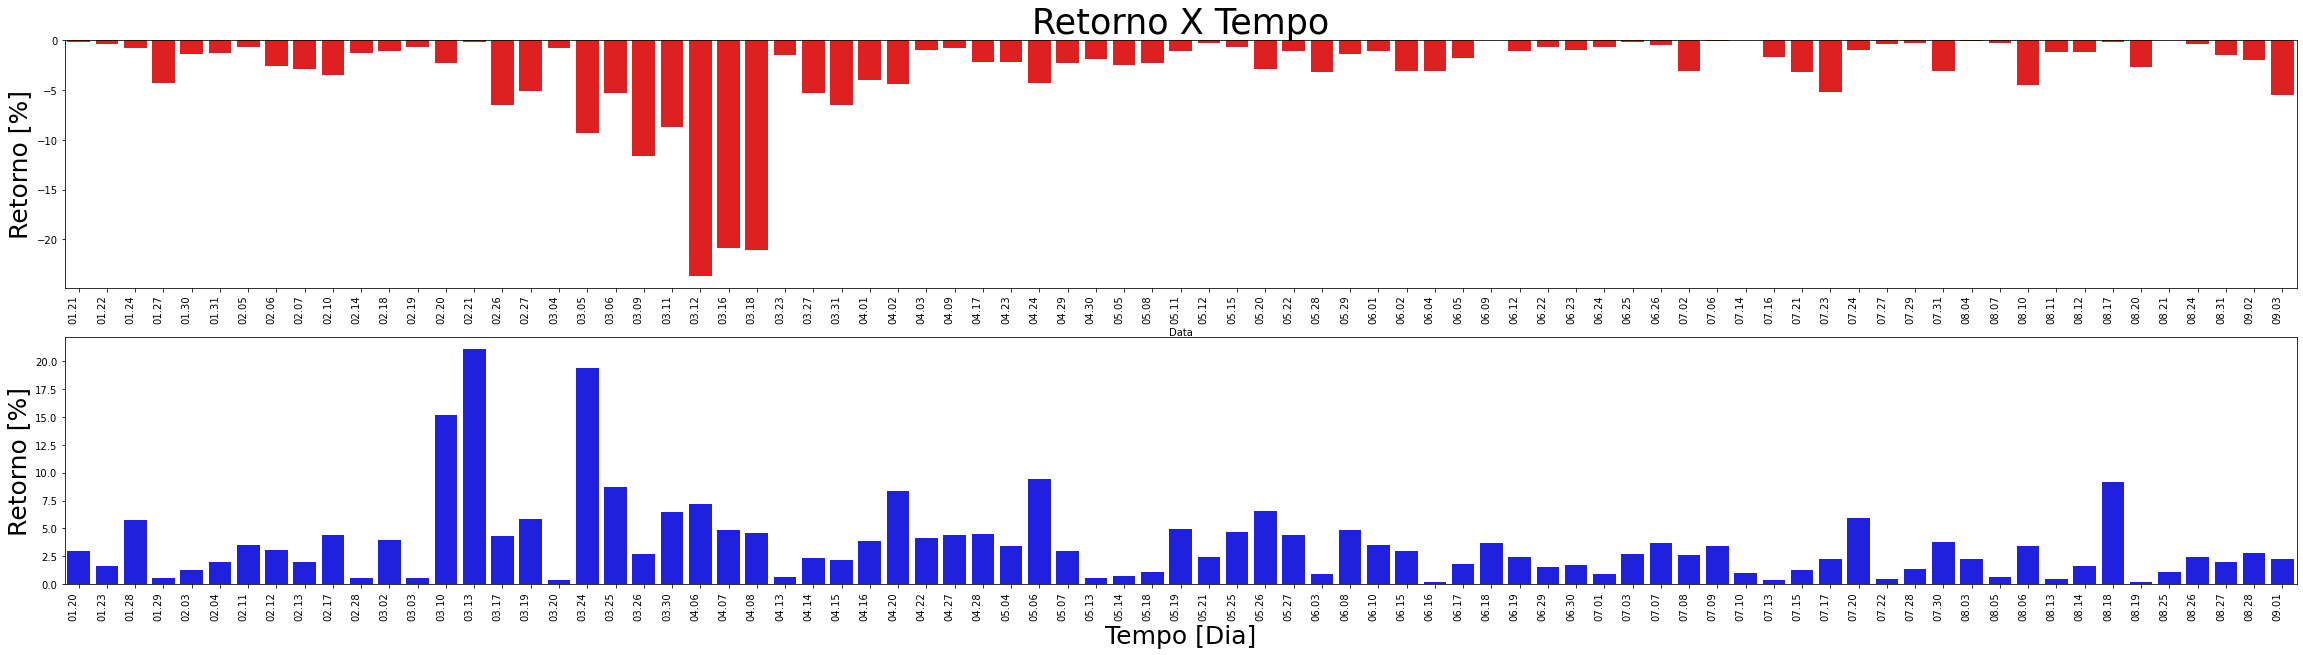

In [16]:
ax, fig = plt.subplots(figsize=(40, 10))
plt.subplot(2,1,1)

ax = sns.barplot(x="Data", 
                 y="Retorno", 
                 data = menor_zero,
                 color = 'Red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_title('Retorno X Tempo', fontsize = 35) 
ax.set_ylabel('Retorno [%]',fontsize=25)

plt.subplot(2,1,2)
ax = sns.barplot(x="Data", 
                 y="Retorno", 
                 data = maior_zero,
                 color = 'Blue')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_ylabel('Retorno [%]',fontsize=25)
ax.set_xlabel('Tempo [Dia]',fontsize=25)
plt.show()


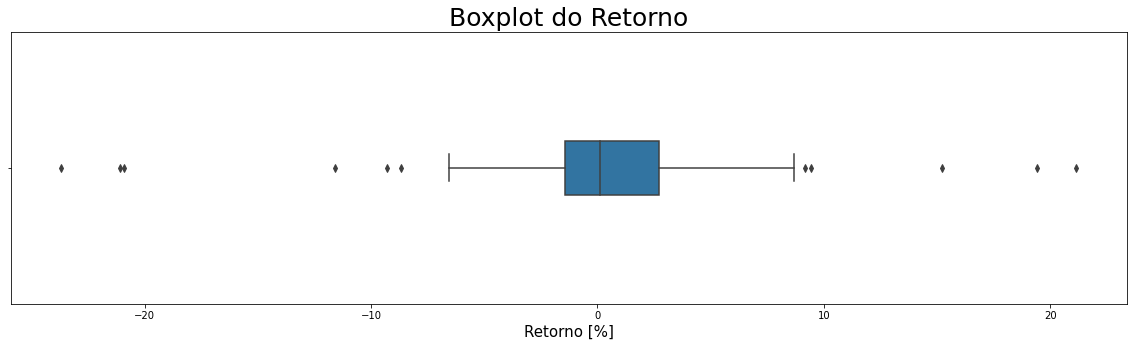

In [41]:
ax, fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(dados_analisados.Retorno,
                 orient = 'h',
                 width=0.2)
ax.set_title('Boxplot do Retorno', fontsize = 25)
ax.set_xlabel('Retorno [%]', fontsize = 15)
plt.show()

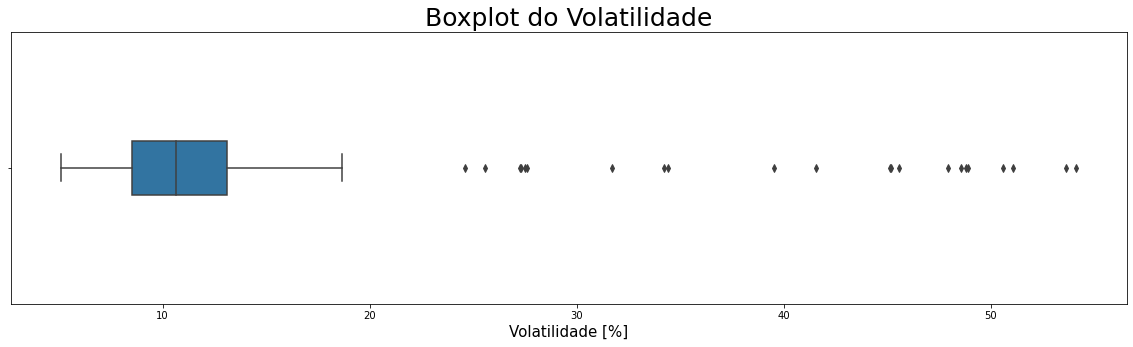

In [43]:
ax, fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(dados_analisados.Volatilidade,
                 orient = 'h',
                 width=0.2)
ax.set_title('Boxplot do Volatilidade', fontsize = 25)
ax.set_xlabel('Volatilidade [%]', fontsize = 15)
plt.show()

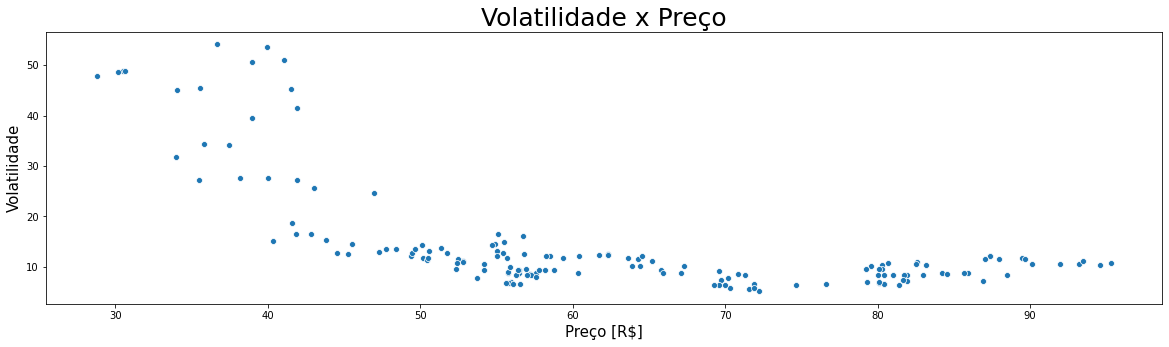

In [82]:
ax, fig = plt.subplots(figsize=(20, 5))
ax = sns.scatterplot(x = 'Preco',
                     y = 'Volatilidade',
                    data = dados_analisados)
ax.set_title('Volatilidade x Preço', fontsize = 25)
ax.set_xlabel('Preço [R$]', fontsize = 15)
ax.set_ylabel('Volatilidade', fontsize=15)
plt.show()

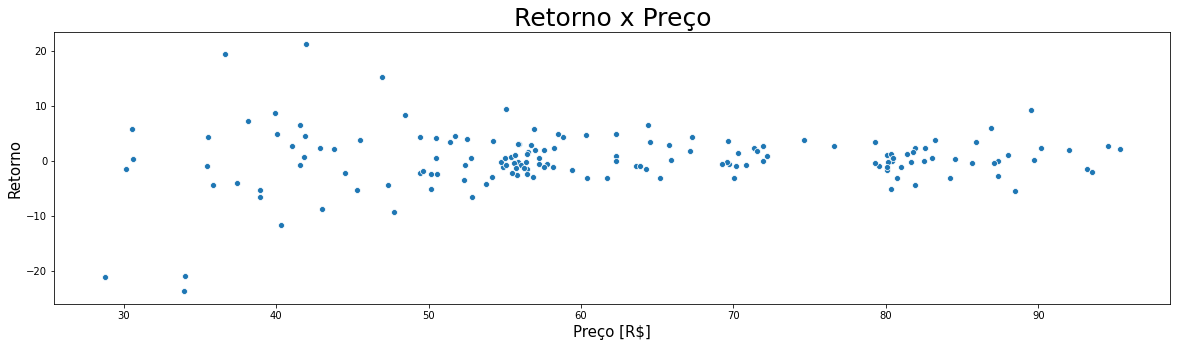

In [81]:
ax, fig = plt.subplots(figsize=(20, 5))
ax = sns.scatterplot(x = 'Preco',
                     y = 'Retorno',
                    data = dados_analisados)
ax.set_title('Retorno x Preço', fontsize = 25)
ax.set_xlabel('Preço [R$]', fontsize = 15)
ax.set_ylabel('Retorno', fontsize=15)
plt.show()